<a href="https://colab.research.google.com/github/Jayant200102/ML_Projects/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-3-ad43b76006a0>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


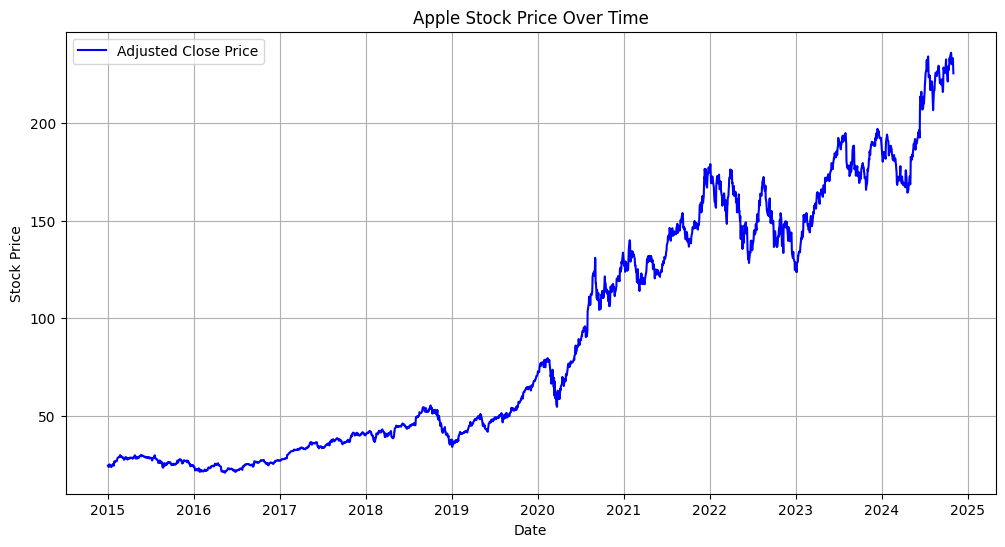

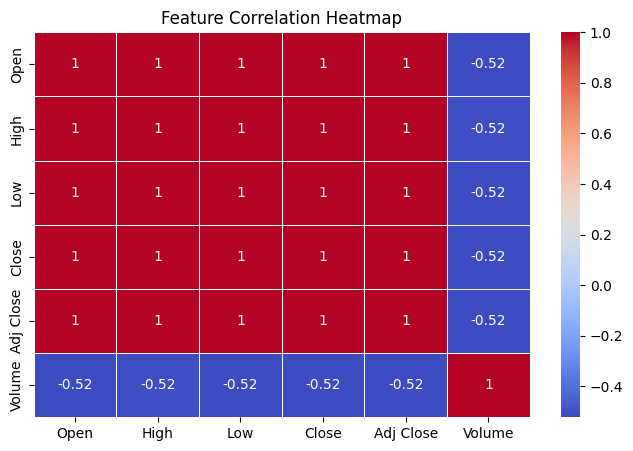

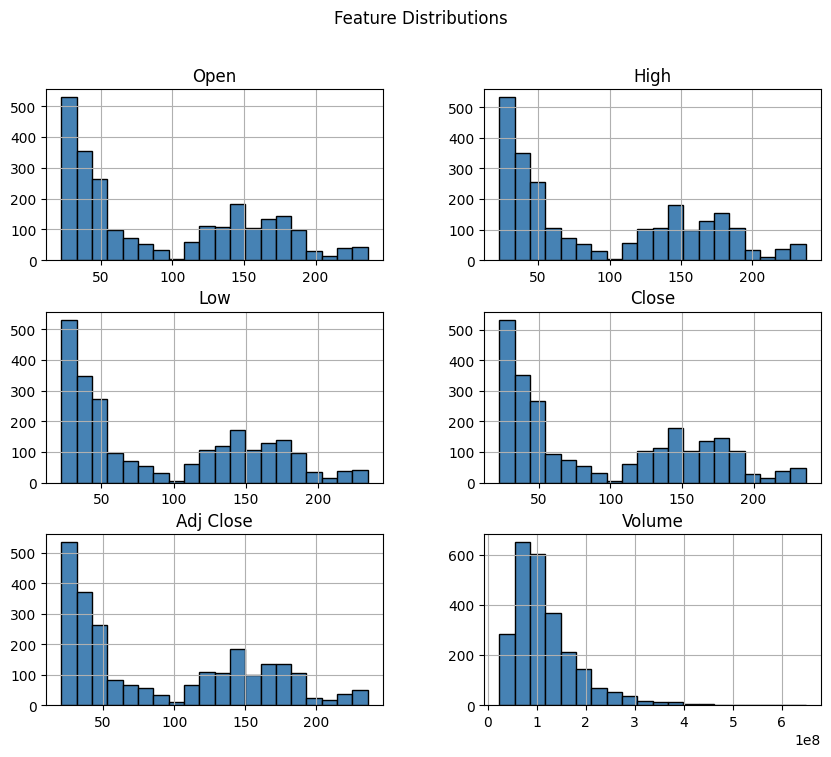

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+03, tolerance: 4.661e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LASSO MSE: 6.2235
Elastic Net MSE: 14.0104
Ridge MSE: 3.9212
ANN MSE: 3.8965


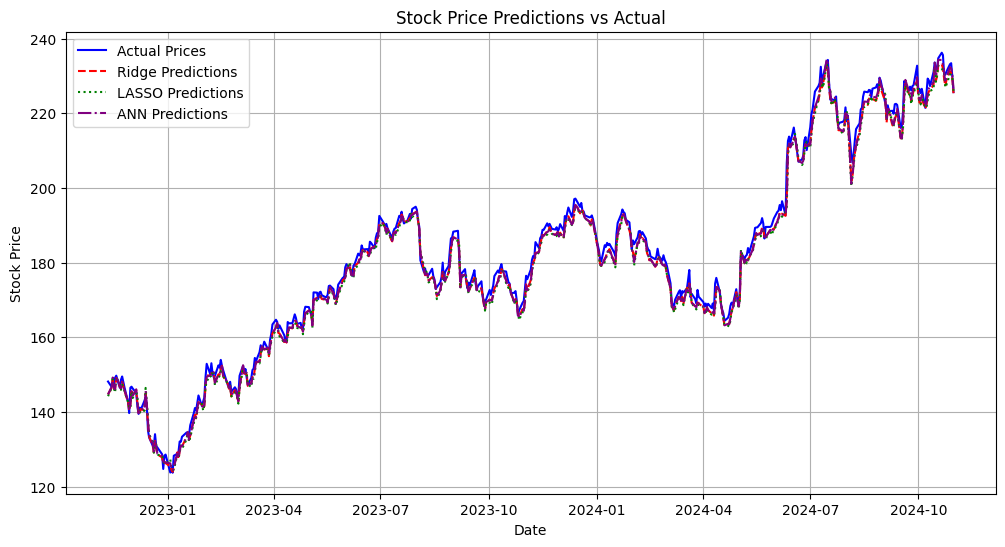

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, ElasticNetCV, Ridge
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load the data
data = pd.read_csv('/content/sample_data/AAPL.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Convert dates to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set date as index for plotting

# Step 2: Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Histograms
data.hist(figsize=(10, 8), bins=20, color='steelblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Step 3: Preprocessing (Split Data)
splitRatio = 0.8
n = len(data)
trainSize = int(splitRatio * n)
trainData, testData = data.iloc[:trainSize], data.iloc[trainSize:]

trainFeatures = trainData[['Open', 'High', 'Low']].values
trainTarget = trainData['Adj Close'].values
testFeatures = testData[['Open', 'High', 'Low']].values
testTarget = testData['Adj Close'].values

# Normalize the data
mu, sigma = trainFeatures.mean(axis=0), trainFeatures.std(axis=0)
trainFeaturesNorm = (trainFeatures - mu) / sigma
testFeaturesNorm = (testFeatures - mu) / sigma

# Step 4: Apply Models
# LASSO
lasso = LassoCV(cv=5).fit(trainFeaturesNorm, trainTarget)
lassoPredictions = lasso.predict(testFeaturesNorm)
lassoMSE = np.mean((lassoPredictions - testTarget) ** 2)

# Elastic Net
enet = ElasticNetCV(cv=5, l1_ratio=0.5).fit(trainFeaturesNorm, trainTarget)
enetPredictions = enet.predict(testFeaturesNorm)
enetMSE = np.mean((enetPredictions - testTarget) ** 2)

# Ridge Regression
ridge = Ridge(alpha=1).fit(trainFeaturesNorm, trainTarget)
ridgePredictions = ridge.predict(testFeaturesNorm)
ridgeMSE = np.mean((ridgePredictions - testTarget) ** 2)

# Artificial Neural Network (ANN)
model = Sequential([
    Dense(10, activation='relu', input_shape=(trainFeaturesNorm.shape[1],)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(trainFeaturesNorm, trainTarget, epochs=100, batch_size=10, verbose=0)
annPredictions = model.predict(testFeaturesNorm).flatten()
annMSE = np.mean((annPredictions - testTarget) ** 2)

# Step 5: Compare Models
print(f"LASSO MSE: {lassoMSE:.4f}")
print(f"Elastic Net MSE: {enetMSE:.4f}")
print(f"Ridge MSE: {ridgeMSE:.4f}")
print(f"ANN MSE: {annMSE:.4f}")

# Step 6: Prediction Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index[trainSize:], testTarget, label="Actual Prices", color='blue')
plt.plot(data.index[trainSize:], ridgePredictions, label="Ridge Predictions", linestyle='dashed', color='red')
plt.plot(data.index[trainSize:], lassoPredictions, label="LASSO Predictions", linestyle='dotted', color='green')
plt.plot(data.index[trainSize:], annPredictions, label="ANN Predictions", linestyle='dashdot', color='purple')
plt.title("Stock Price Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()
